# Estruturas de Controle - Módulo 4

## Novas perguntas do CEO

1. Qual a média do preço de compra dos imóveis por “Nível”? 
- Nível 0 -> Preço entre 0 e 321.950
- Nível 1 -> Preço entre 321.950 e 450.000
- Nível 2 -> Preço entre 450.000 e 645.000
- Nível 3 -> Acima de 645.000

2. Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427 sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e 2550 sqft
- Size 3 -> Tamanho acima de 2550 sqft

3. Adicione as seguinte informações ao conjunto de dados original:
- Place ID: Identificação da localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País

4. Adicione os seguinte filtros no Mapa:
- Tamanho mínimo da área da sala de estar.
- Número mínimo de banheiros.
- Valor Máximo do Preço.
- Tamanho máximo da área do porão.
- Filtro das Condições do Imóvel.
- Filtro por Ano de Construção.

5. Adicione os seguinte filtros no Dashboard:
- Filtro por data disponível para compra.
- Filtro por ano de renovação.
- Filtro se possui vista para a água ou não.

# Resolução

## Import Libraries

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import gridspec
from matplotlib import pyplot as plt
import ipywidgets as widgets
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual

In [64]:
# Supress Scientific Notation
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', '{:.2f}'.format)

## Loading Data

In [65]:
data = pd.read_csv('datasets/kc_house_data.csv')

data['date'] = pd.to_datetime( data['date'], format='%Y-%m-%d' )

## 1. Qual a média do preço de compra dos imóveis por “Nível”? 
- Nível 0 -> Preço entre 0 e 321.950
- Nível 1 -> Preço entre 321.950 e 450.000
- Nível 2 -> Preço entre 450.000 e 645.000
- Nível 3 -> Acima de 645.000

In [66]:
data['level'] = data['price'].apply(lambda x: 'lv0' if x <= 321950 else
                                   'lv1' if (x > 321950) & (x <= 450000) else
                                   'lv2' if (x > 450000) & (x <= 645000) else
                                   'lv3')

In [67]:
data[['level', 'price']].groupby('level'). mean().reset_index()

,level,price
0,lv0,251557.65
1,lv1,385688.68
2,lv2,539730.96
3,lv3,987540.22


## 2. Qual a média do tamanho da sala de estar dos imóveis por “Size” ?
- Size 0 -> Tamanho entre 0 e 1427 sqft
- Size 1 -> Tamanho entre 1427 e 1910 sqft
- Size 2 -> Tamanho entre 1910 e 2550 sqft
- Size 3 -> Tamanho acima de 2550 sqft

In [68]:
data['size'] = data['sqft_living'].apply(lambda x: 'size0' if x <= 1427 else
                                        'size1' if (x > 1427) & (x <= 1910) else
                                        'size2' if (x > 1910) & ( x <= 2550) else 'size3')

In [69]:
data[['sqft_living', 'size']].groupby('size').mean().reset_index()

,size,sqft_living
0,size0,1123.83
1,size1,1664.96
2,size2,2211.79
3,size3,3329.61


## 3. Adicione as seguinte informações ao conjunto de dados original:
- Place ID: Identificação da localização
- OSM Type: Open Street Map type
- Country: Nome do País
- Country Code: Código do País

In [70]:
import time
import dataget
from multiprocessing import Pool

data['query'] = data[['lat', 'long']].apply(lambda x: str(x['lat']) + ',' + str(x['long']), axis=1)
df1 = data[['id', 'query']].head()

p = Pool(2)
start = time.process_time()
df1[['place_id', 'osm_type', 'country', 'country_code']] = p.map(dataget.get_data, df1.iterrows())
print(time.process_time() - start)

0.015625


In [71]:
df1.head()

,id,query,place_id,osm_type,country,country_code
0,7129300520,"47.5112,-122.257",161022547,way,United States,us
1,6414100192,"47.721,-122.319",160016678,way,United States,us
2,5631500400,"47.7379,-122.233",74951055,node,United States,us
3,2487200875,"47.5208,-122.393",156726151,way,United States,us
4,1954400510,"47.6168,-122.045",296045104,way,United States,us


In [72]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
level                    object
size                     object
query                    object
dtype: object

## 4. Adicione os seguintes filtros no Mapa:
- Tamanho mínimo da área da sala de estar: usares o sqft_living para filtrar;
- Número mínimo de banheiros: usaremos o bathrooms;
- Valor Máximo do Preço: usaremos o price;
- Tamanho máximo da área do porão: usaremos o basement;
- Filtro das Condições do Imóvel: usaremos o condition
- Filtro por Ano de Construção: usaremos o yr_built.

In [73]:
data['level'] = data['price'].apply(lambda x: 0 if x <= 321950 else 
                                           1 if (x > 321950) & (x <= 450000) else 
                                           2 if (x > 450000) & (x <= 645000) else 3)

# Iterative buttons
                                    
living_min = widgets.IntSlider(
    min=data['sqft_living'].min(),
    max=data['sqft_living'].max(),
    step=1, description='minimum living room',
    disable=False)

bath_min = widgets.IntSlider(
    min=data['bathrooms'].min(),
    max=data['bathrooms'].max(),
    step=1, description='min bathrooms numbers',
    disable=False)

price_max = widgets.IntSlider(
    value=data['price'].max(),
    min=data['price'].min(),
    max=data['price'].max(),
    step=1, description='max price',
    disable=False)

basemant_max = widgets.IntSlider(
    min=data['sqft_basement'].min(),
    max=data['sqft_basement'].max(),
    step=1, description='max basemant', value=data['sqft_basement'].max(),
    disable=False)

condition_set = widgets.Dropdown(
    options=sorted(data['condition'].unique().tolist()),
    value=3,
    description='condition', disable=False
)

year_min = widgets.IntSlider(
    value = int( data['yr_built'].mean()), 
    min = data['yr_built'].min(),
    max = data['yr_built'].max(),
    step = 1,
    description='year built',
    disable=False,
    style={'description_width': 'initial'}
)

# Creating a uptade_map function
def update_map(df, living, bath, price, basemant, condition, year):
    data_map = df[(df['sqft_living'] >= living) &
                 (df['bathrooms'] >= bath) &
                 (df['price'] <= price) &
                 (df['sqft_basement'] <= basemant) &
                 (df['condition'] == condition) &
                 (df['yr_built'] >= year)]
    
    fig = px.scatter_mapbox( data_map, 
                             lat="lat", 
                             lon="long", 
                             size="price",
                             color="level",
                             color_continuous_scale=px.colors.cyclical.IceFire, 
                             size_max=30, 
                             zoom=10)

    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
    fig.show()

In [99]:
widgets.interactive(update_map, df=fixed(data), living=living_min, 
                    bath=bath_min, price=price_max,
                   basemant=basemant_max, condition=condition_set,
                   year=year_min)

interactive(children=(IntSlider(value=290, description='minimum living room', max=13540, min=290), IntSlider(v…

## 5. Adicione os seguinte filtros no Dashboard:
   - Filtro por data disponível para compra.
   - Filtro por ano de renovação.
   - Filtro se possui vista para a água ou não.

In [75]:
data['year'] = pd.to_datetime(data['date']).dt.strftime('%Y')
data['date'] = pd.to_datetime(data['date']).dt.strftime('%Y-%m-%d')
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')

Criando o dashboard separadamente

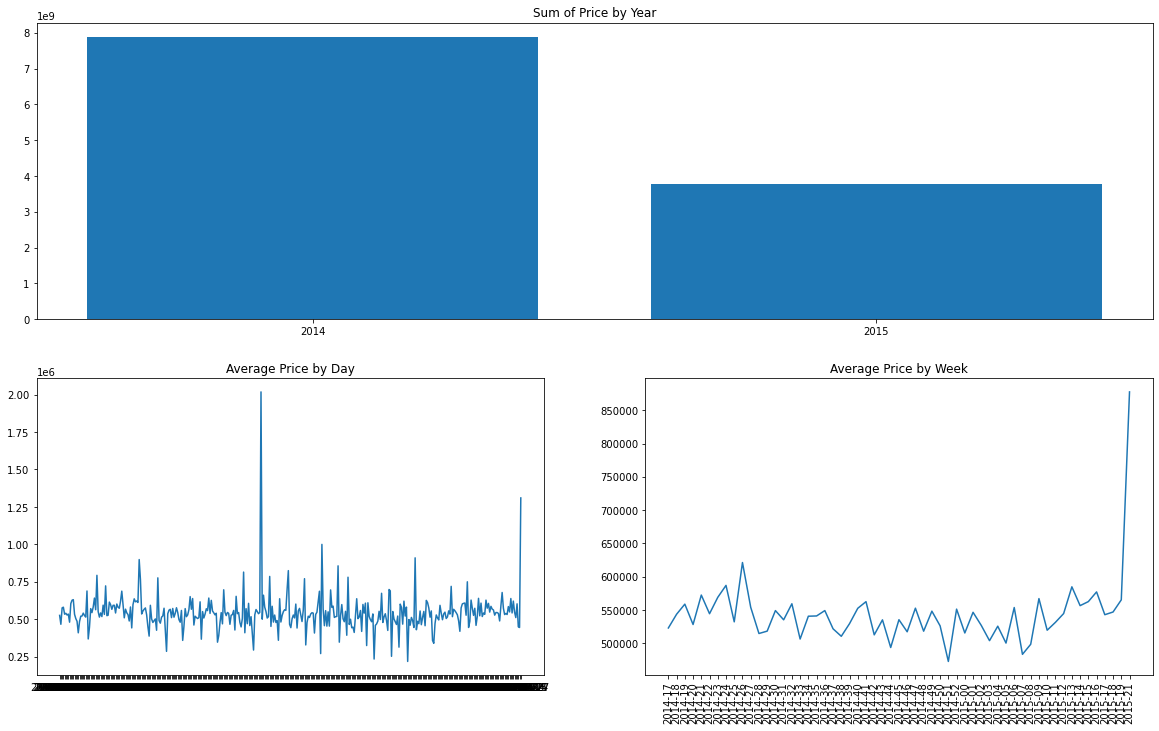

In [77]:
fig= plt.figure(figsize=(20, 12))
specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
    
ax1 = fig.add_subplot(specs[0, :])
ax2 = fig.add_subplot(specs[1, 0])
ax3 = fig.add_subplot(specs[1, 1])

year_data = data[['price', 'year']].groupby('year').sum().reset_index()
ax1.bar(year_data['year'], year_data['price']);
ax1.set_title('Sum of Price by Year');

day_data = data[['price', 'date']].groupby('date').mean().reset_index()
ax2.plot(day_data['date'], day_data['price']);
ax2.set_title('Average Price by Day');

week_data = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
ax3.plot(week_data['year_week'], week_data['price']);
ax3.set_title('Average Price by Week')
plt.xticks(rotation=90);

Criando os filtros

In [95]:
date_max = widgets.SelectionSlider(
    options=data['date'].sort_values().tolist(),
    value='2014-10-16',
    description='max date',
    disable=False, readout=True
)

waterfront_option = widgets.Checkbox(
    value=False, description='waterfront',
    disabled=False, indent=False
)

Criando a função

In [96]:
def update_map_dash(df, date, waterfront):
    dash_data = df[(df['date'] <= date) &
                  (df['waterfront'] == waterfront)]
    
    fig= plt.figure(figsize=(20, 12))
    specs = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)
        
    ax1 = fig.add_subplot(specs[0, :])
    ax2 = fig.add_subplot(specs[1, 0])
    ax3 = fig.add_subplot(specs[1, 1])
    
    year_data = dash_data[['price', 'year']].groupby('year').sum().reset_index()
    ax1.bar(year_data['year'], year_data['price']);
    ax1.set_title('Sum of Price by Year');
    
    day_data = dash_data[['price', 'date']].groupby('date').mean().reset_index()
    ax2.plot(day_data['date'], day_data['price']);
    ax2.set_title('Average Price by Day');
    
    week_data = dash_data[['price', 'year_week']].groupby('year_week').mean().reset_index()
    ax3.plot(week_data['year_week'], week_data['price']);
    ax3.set_title('Average Price by Week')
    plt.xticks(rotation=90);

Plotando o gráfico com os filtros

In [97]:
widgets.interactive(update_map_dash, df=fixed(data), date=date_max,
                   waterfront=waterfront_option)

interactive(children=(SelectionSlider(description='max date', index=10750, options=('2014-05-02', '2014-05-02'…